1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

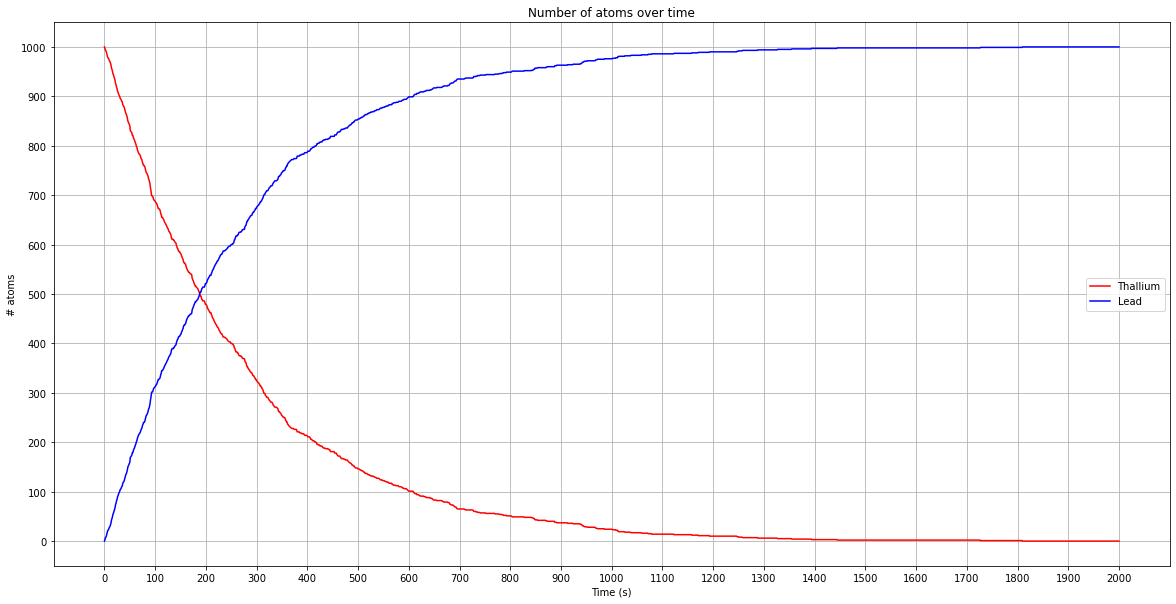

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
npr.seed(3)

# defining the function that returns the probability 'p(t)'
def p(t):
    tau = 3.052*60   # half-life of thallium-208 expressed in seconds
    return 1-2**(-(t/tau))

# computing the number of atoms over time
N = 1000   # initial number of thallium atoms
time = np.arange(2001)   # time window: [0 s, 2000 s], step: 1 s
probs = npr.random(N)   # associating a probability of survival to each thallium atom
thallium = [len(probs[probs > p(t)]) for t in time]   # number of thallium atoms over time (at each instant of time, a thallium atom survives if its probability of survival 'probs' is > than the probability of decay 'p(t)')
lead = [N-i for i in thallium]   # number of lead atoms over time

# plotting the number of atoms over time
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, thallium, color='red', label='Thallium')
ax.plot(time, lead, color='blue', label='Lead')
ax.set_xticks(time[::int(time[-1]/20)])
ax.set_yticks(range(0, N+1, int(N/10)))
ax.set_xlabel('Time (s)')
ax.set_ylabel('# atoms')
ax.set_title('Number of atoms over time')
ax.legend()
ax.grid()
plt.show()

Now let's repeat the exercise using the **inverse transformation method** to sample random numbers from the following p.d.f.:

$$
p(t) = 2^{-\frac{t}{\tau}} \frac{\ln 2}{\tau}
$$

First of all, note that $p(t)$ is already normalized in the interval $[0, +\infty]$:

$$
\int_{0}^{+\infty} p(t) dt = \int_{0}^{+\infty} 2^{-\frac{t}{\tau}} \frac{\ln 2}{\tau} dt = 1
$$

Then, let's start from a uniform distribution $u(z)$:

$$
u(z) =
\left\{
\begin{array}{ll}
      1 & 0\leq z\leq 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

and let's look for a function $t(z)$ such that $t$ is distributed accordingly to the p.d.f. $p(t)$. The probability to find $t$ between $t$ and $t+dt$ is equal to:

$$
p(t) dt = dz
$$

Therefore:

$$
\int_{0}^{t(z)} p(t') dt' = \int_{0}^{z} dz'
$$

Let's calculate both integrals:

$$
\int_{0}^{t(z)} p(t') dt' = \int_{0}^{t(z)} 2^{-\frac{t'}{\tau}} \frac{\ln 2}{\tau} dt' = 1-2^{-\frac{t(z)}{\tau}}
$$

$$
\int_{0}^{z} dz' = z
$$

Therefore:

$$
1-2^{-\frac{t(z)}{\tau}} = z
$$

$$
t(z) = -\tau \log_{2} (1-z)
$$

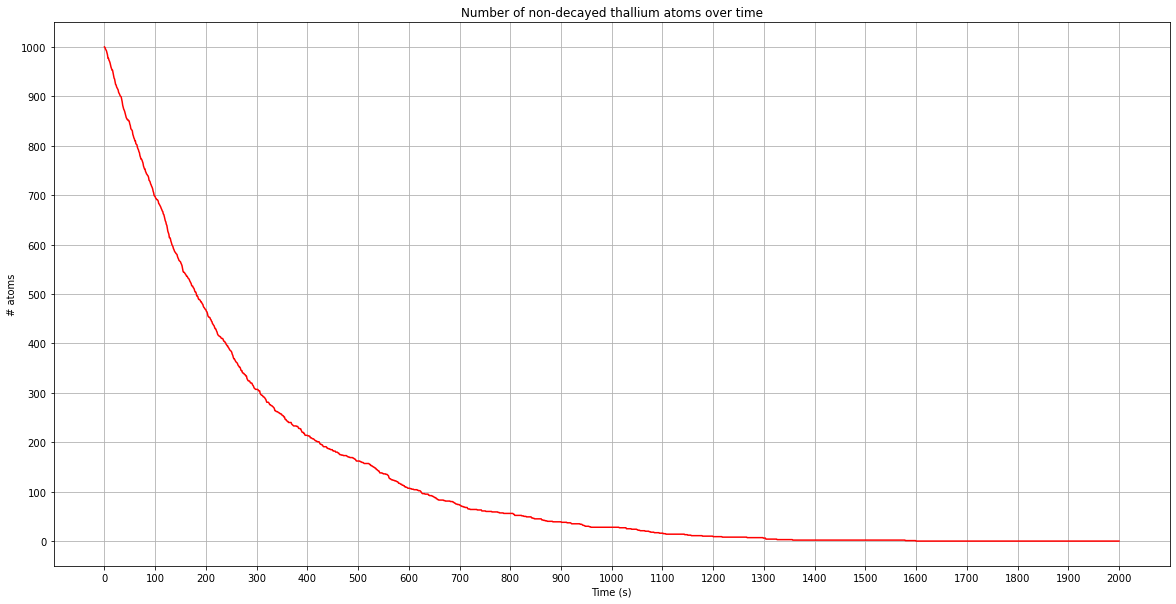

In [2]:
# defining the function (obtained using the inverse transformation method) that returns the decay time
def t(z):
    tau = 3.052*60   # half-life of thallium-208 expressed in seconds
    return -tau*np.log2(1-z)

# computing the decay times of the thallium atoms
z = npr.uniform(0, 1, N)
decay_times = t(z)

# computing the number of non-decayed thallium atoms over time
non_decayed = [len(decay_times[decay_times > t]) for t in time]

# plotting the number of non-decayed thallium atoms over time
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, non_decayed, color='red')
ax.set_xticks(time[::int(time[-1]/20)])
ax.set_yticks(range(0, N+1, int(N/10)))
ax.set_xlabel('Time (s)')
ax.set_ylabel('# atoms')
ax.set_title('Number of non-decayed thallium atoms over time')
ax.grid()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
from scipy import constants as c

# defining the function that returns the scattering angle at a given impact parameter 'b'
def scatter_angle(b):
    Z = 79
    e = c.e
    pi = np.pi
    eps = c.epsilon_0
    E = 7.7*(10**6)*e   # energy of the beam expressed in joules
    tan = (Z*(e**2))/(2*pi*eps*E*b)
    return 2*np.arctan(tan)

# generating the impact parameters using the Box–Muller transform
N = 10**6   # number of alpha particles
a0 = c.physical_constants['Bohr radius'][0]
sigma = a0/100
z = npr.random(N)
r_squared = -2*(sigma**2)*np.log(z)
impact_params = np.sqrt(r_squared)

# computing the corresponding scattering angles
scatter_angles = scatter_angle(impact_params)

# computing the fraction of backscattered particles
backscatter = scatter_angles[scatter_angles > (np.pi/2)]
fraction = len(backscatter)/N
print('Fraction of backscattered particles:', fraction)

Fraction of backscattered particles: 0.001552


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [4]:
# defining the function that computes the integral of 'f(x)' between 'x_low' and 'x_high' using the hit-or-miss method
def hit_miss(f, x_low, x_high, f_max, N):
    A = (x_high-x_low)*f_max
    x = npr.uniform(x_low, x_high, N)
    y = npr.random(N)
    k = np.sum(y < f(x))
    return k*A/N

# defining the function that computes the integral of 'f(x)' between 'x_low' and 'x_high' using the mean value method
def mean_value(f, x_low, x_high, N):
    x = npr.uniform(x_low, x_high, N)
    f_sum = np.sum(f(x))
    return ((x_high-x_low)/N)*f_sum

# defining the integrand function 'f(x)'
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# setting the integration parameters
x_low, x_high = 0, 2   # extremes of integration
f_max = 1   # maximum value that the function 'f(x)' assumes in the integration interval
N = 10**6   # number of sampling points
R = 10**2   # number of repetitions of the integral computation

# computing the integral of 'f(x)' between 'x_low' and 'x_high' using the hit-or-miss method
I_hm = [hit_miss(f, x_low, x_high, f_max, N) for i in range(R)]   # performing the computation 'R' times
hm_mean = np.mean(I_hm)   # estimate of the result of the integral
hm_std = np.std(I_hm)   # error of the estimate
print("Integral of 'f(x)' between", x_low, "and", x_high, "computed using the hit-or-miss method:\n", hm_mean, "+-", hm_std)

# computing the integral of 'f(x)' between 'x_low' and 'x_high' using the mean value method
I_mv = [mean_value(f, x_low, x_high, N) for i in range(R)]   # performing the computation 'R' times
mv_mean = np.mean(I_mv)   # estimate of the result of the integral
mv_std = np.std(I_mv)   # error of the estimate
print("\nIntegral of 'f(x)' between", x_low, "and", x_high, "computed using the mean value method:\n", mv_mean, "+-", mv_std)

Integral of 'f(x)' between 0 and 2 computed using the hit-or-miss method:
 1.4515307600000003 +- 0.000839930462836062

Integral of 'f(x)' between 0 and 2 computed using the mean value method:
 1.4513020145422089 +- 0.0005080795368733671


Therefore, the error obtained with the hit-or-miss method is greater than that obtained with the mean value method.

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
# defining the function that computes the volume of the n-dimensional hypersphere of unit radius
def h_sphere(dim):
    N = 10**7   # number of sampling points

    # defining the integrand function 'f(x)' with 'x' of dimension equal to 'dim'
    def f(x):
        return np.sum(x**2, axis=1) <= 1

    # computing the integral of 'f(x)' using the mean value method
    x_low, x_high = -1, 1   # extremes of integration for each dimension
    V = (x_high-x_low)**dim   # volume of the integration space
    x = np.random.uniform(low=x_low, high=x_high, size=(N, dim))   # sampling points
    return (V/N)*np.sum(f(x))

# computing the area of the circle of unit radius
print("Area of the circle of unit radius:", h_sphere(dim=2))

# computing the volume of the 10D sphere of unit radius
print("Volume of the 10D sphere of unit radius:", h_sphere(dim=10))

Area of the circle of unit radius: 3.1420019999999997
Volume of the 10D sphere of unit radius: 2.558464


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [6]:
# defining the integrand function 'f(x)'
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

# defining the importance function 'w(x)'
def w(x):
    return x**(-1/2)

Let's use the **inverse transformation method** to sample random numbers from the p.d.f. $p(x)$ associated with the importance function $w(x)$.

First of all, let's normalize the importance function $w(x)$ in the integration interval $[0,1]$ in order to obtain an appropriate p.d.f. $p(x)$:

$$
\int_{0}^{1} w(x) dx = \int_{0}^{1} \frac{1}{\sqrt{x}} dx = 2 \equiv C
$$

Therefore:

$$
p(x) = \frac{1}{C} w(x) = \frac{1}{2\sqrt{x}}
$$

Then, let's start from a uniform distribution $u(z)$:

$$
u(z) =
\left\{
\begin{array}{ll}
      1 & 0\leq z\leq 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

and let's look for a function $x(z)$ such that $x$ is distributed accordingly to the p.d.f. $p(x)$. The probability to find $x$ between $x$ and $x+dx$ is equal to:

$$
p(x) dx = dz
$$

Therefore:

$$
\int_{0}^{x(z)} p(x') dx' = \int_{0}^{z} dz'
$$

Let's calculate both integrals:

$$
\int_{0}^{x(z)} p(x') dx' = \int_{0}^{x(z)} \frac{1}{2\sqrt{x'}} dx' = \sqrt{x(z)}
$$

$$
\int_{0}^{z} dz' = z
$$

Therefore:

$$
\sqrt{x(z)} = z
$$

$$
x(z) = z^2
$$

In [7]:
# defining the function obtained using the inverse transformation method
def x(z):
    return z**2

# computing the integral of 'f(x)' using the importance sampling method
N = 10**7   # number of sampling points
x_low, x_high = 0, 1   # extremes of integration
z = npr.uniform(x_low, x_high, N)   # sampling points from the uniform distribution 'u(z)'
x = x(z)   # sampling points from the p.d.f. 'p(x)' associated with the importance function 'w(x)'
I_w = 2   # integral of 'w(x)' between 'x_low' and 'x_high'
I_f = (1/N)*np.sum(f(x)/w(x))*I_w   # integral of 'f(x)' between 'x_low' and 'x_high'
print("Integral of 'f(x)' between", x_low, "and", x_high, "computed using the importance sampling method:", I_f)

Integral of 'f(x)' between 0 and 1 computed using the importance sampling method: 0.838875665839461
